In [165]:
import numpy as np


def bilinear_coefficients(x1, x2, y1, y2, f11, f21, f12, f22):
    coef_matrix = np.array([[1, x1, y1, x1 * y1], [1, x2, y1, x2 * y1], [1, x1, y2, x1 * y2], [1, x2, y2, x2 * y2]])
    return np.linalg.inv(coef_matrix) @ np.array([f11, f21, f12, f22])


a = bilinear_coefficients(0, 1, 0, 1, 1, -1, -10, 1)

def bilinear_fun(x):

    return a[0] + a[1] * x[0] + a[2] * x[1] + a[3] * x[0] * x[1]


def bilinear_jac(x):
    return np.array([a[1] + a[3] * x[1], a[2] + a[3] * x[0]])


In [167]:
def newtRoot(x0, func, dfunc):
    x = np.array(x0)
    for n in range(100):  # do at most 100 iterations
        f = func(x)
        df = dfunc(x)

        if abs(f) < 1e-6:  # exit function if we're close enough
            break

        x = x - df * f / np.linalg.norm(df) ** 2  # update guess
    return x


sol = newtRoot([0.1, 0.1], bilinear_fun, bilinear_jac)

print(sol, bilinear_fun(sol))

[0.09874458 0.08259411] 1.0488443447087548e-09


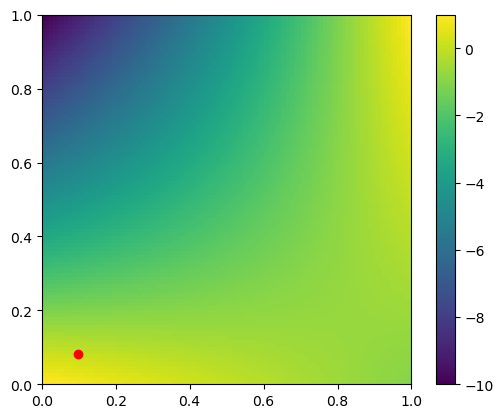

In [169]:
xlin = np.linspace(0, 1, 100)
ylin = np.linspace(0, 1, 100)

X, Y = np.meshgrid(xlin, ylin)

points = np.array([X.ravel(), Y.ravel()]).T

Z = np.array([bilinear_fun(p) for p in points]).reshape(100, 100)

import matplotlib.pyplot as plt
plt.imshow(Z, extent=(0, 1, 0, 1), origin='lower', cmap='viridis')
plt.plot(sol[0], sol[1], 'ro')
plt.colorbar()

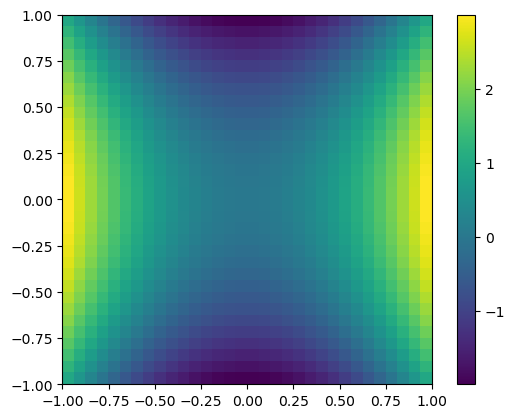

In [214]:
samples = 32
xlin = np.linspace(-1, 1, samples)
ylin = np.linspace(-1, 1, samples)
zlin = np.linspace(-1, 1, samples)

X, Y, Z = np.meshgrid(xlin, ylin, zlin)
value = 3*X**2-2*Y**2

plt.imshow(value[:,:,samples//2], extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
plt.colorbar()


[1. 1. 1. 1.]
[1. 1. 1. 1.]
[ 1.  1. -1.  1.]
[0.1452912  0.96112144] 0.0
[-1.  1. -1. -1.]
[0.62124317 0.3545082 ] 1.3877787807814457e-17
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1.  1.]
[0.62124317 0.6454918 ] 2.7755575615628914e-17
[-1.  1.  1.  1.]
[0.1452912  0.03887856] -2.0816681711721685e-17
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[ 1.  1. -1.  1.]
[0.22908654 0.84831731] 0.0
[-1.  1. -1. -1.]
[0.71489589 0.24672985] 1.3877787807814457e-17
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. -1. -1.]
[-1. -1. 

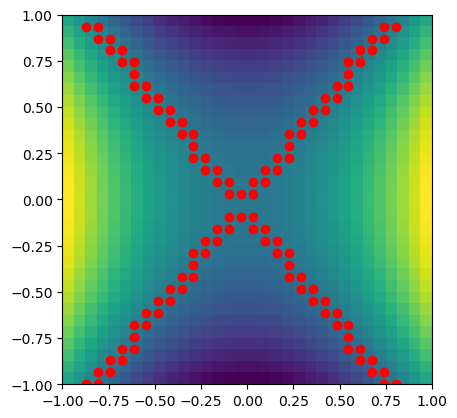

In [215]:
x = X[:,:,samples//2]
y = Y[:,:,samples//2]

values = value[:,:,samples//2]

for i in range(samples-1):
    for j in range(samples-1):
        corners = np.array([values[i,j], values[i+1,j], values[i,j+1], values[i+1,j+1]])
        positions = np.array([[x[i,j], y[i,j]], [x[i+1,j], y[i+1,j]], [x[i,j+1], y[i,j+1]], [x[i+1,j+1], y[i+1,j+1]]])
        print(np.sign(corners))
        if np.abs(np.sum(np.sign(corners))) < 4:
            a = bilinear_coefficients(0, 1, 0, 1, *corners)
            sol = newtRoot([0.5, 0.5], bilinear_fun, bilinear_jac)

            print(sol, bilinear_fun(sol))
            sol_point = np.array([x[i,j], y[i,j]]) + sol * np.array([x[i+1,j] - x[i,j], y[i,j+1] - y[i,j]])
            plt.plot(sol_point[0], sol_point[1], 'ro')
            
plt.imshow(value[:,:,samples//2], extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')

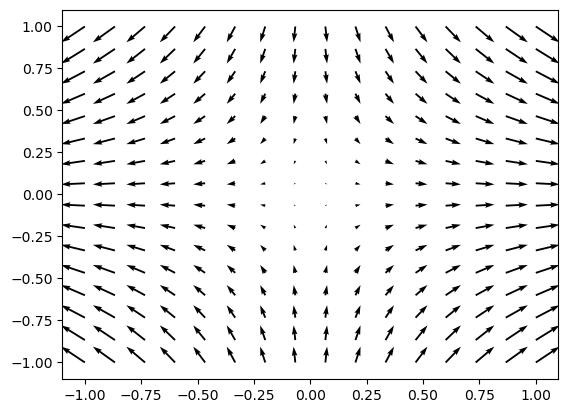

In [171]:
grad = np.gradient(value, xlin, ylin, zlin)

plt.quiver(X[:,:,samples//2], Y[:,:,samples//2], grad[1][:,:,samples//2], grad[0][:,:,samples//2])

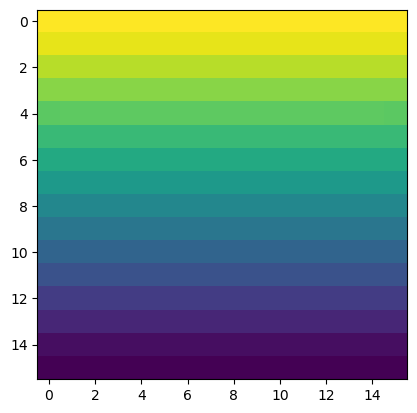

In [172]:
plt.imshow(grad[0][:,:,samples//2])

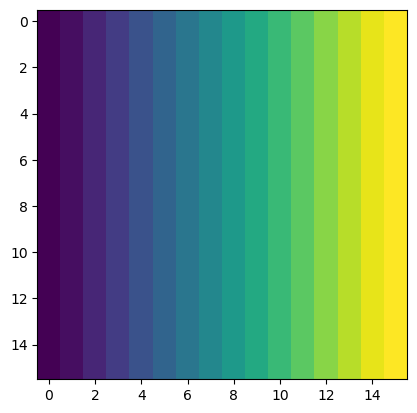

In [173]:
plt.imshow(grad[1][:,:,samples//2])

In [175]:
import scipy
sol = scipy.optimize.root(bilinear_jac, [0.1, 0.1])

In [176]:
print(sol.x, bilinear_fun(sol.x))

[0.84615385 0.15384615] -0.6923076923076925


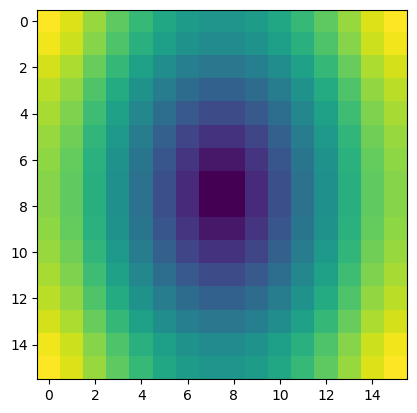

In [177]:
grad_mag = np.linalg.norm(grad, axis=0)

plt.imshow(grad_mag[:,:,samples//2])

In [179]:
import scipy.optimize

fun = lambda x: np.linalg.norm(bilinear_jac(x))


sol = scipy.optimize.fmin(fun, [0.1, 0.1])
print(sol, bilinear_fun(sol))

Optimization terminated successfully.
         Current function value: 0.000080
         Iterations: 46
         Function evaluations: 91
[0.84614825 0.15384354] -0.692307692117482


In [190]:
xlin = np.linspace(-1, 1, 16)
ylin = np.linspace(-1, 1, 16)

X, Y = np.meshgrid(xlin, ylin, indexing='ij')
Z = X**2-Y**2

interp = scipy.interpolate.RectBivariateSpline(xlin, ylin, Z)

In [ ]:
xx = np.linspace(-1,1,100)
yy = np.linspace(-1,1,100)

X, Y = np.meshgrid(xx, yy, indexing='ij')

points = interp(X,Y)

ValueError: Error code returned by bispev: 10

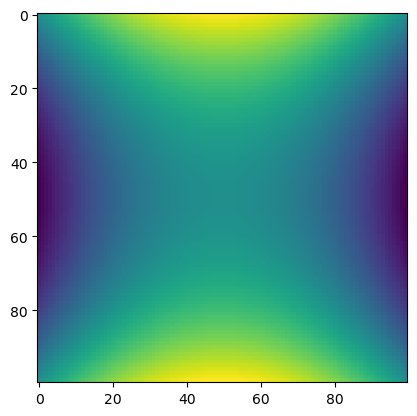

In [185]:
plt.imshow(points)

In [186]:
interp.roots()

AttributeError: 'RegularGridInterpolator' object has no attribute 'roots'

In [189]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
from scipy.optimize import root

# Define a sample function on a grid
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = X**2 - Y**2  # Example function with roots along y = ±x

# Create the RegularGridInterpolator
interpolator = RegularGridInterpolator((x, y), Z)

# Step 1: Sample the interpolated function on a fine grid
x_fine = np.linspace(-5, 5, 100)
y_fine = np.linspace(-5, 5, 100)
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
Z_fine = interpolator((X_fine, Y_fine))

# Step 2: Identify cells with sign changes
roots = []
for i in range(len(x_fine) - 1):
    for j in range(len(y_fine) - 1):
        corners = [
            (x_fine[i], y_fine[j]),
            (x_fine[i + 1], y_fine[j]),
            (x_fine[i], y_fine[j + 1]),
            (x_fine[i + 1], y_fine[j + 1]),
        ]
        values = [interpolator(c)[()] for c in corners]  # Extract scalar values
        if np.any(np.sign(values) != np.sign(values[0])):
            # Sign change detected, approximate location
            guess = np.mean(corners, axis=0)

            # Step 3: Refine the root
            def func(p):
                return interpolator(p)[()]  # Scalar output, ensure shape matches
            
            res = root(func, guess)
            if res.success:
                roots.append(res.x)

# Remove duplicates (numerical noise can create very close roots)
roots = np.unique(np.round(roots, decimals=6), axis=0)

# Display roots
print("Roots found:", roots)


TypeError: fsolve: there is a mismatch between the input and output shape of the 'func' argument 'func'.Shape should be (2,) but it is (1,).